In [2]:
# Guide here https://www.datacamp.com/community/tutorials/web-scraping-using-python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [4]:
url = "https://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [5]:
#soup = BeautifulSoup(html, features="xml")
#soup = BeautifulSoup(html,  "html.parser")
soup = BeautifulSoup(html, 'html.parser')

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [8]:
# Print out the text
text = soup.get_text()
#print(soup.text)

In [9]:
print(soup.text)










2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results





        @media print {
            .noprint {
                display: none;
            }

            .dataTables_filter {
                display: none;
            }
        }

        #individualResults tbody tr {
            cursor: pointer;
        }

        .video-container {
            position: relative;
            padding-bottom: 56.25%; /* 16:9 */
            padding-top: 25px;
            height: 0;
        }

            .video-container iframe {
                position: absolute;
                top: 0;
                left: 0;
                width: 100%;
                height: 100%;
            }

        .dataTables_wrapper .dataTables_paginate {
            float: right;
            text-align: right;
            padding-top: 0.25em;
        }

            .dataTables_wrapper .dataTables_paginate .paginate_button {
                box-sizing: border-box;
                display: inl

You can use the find_all() method of soup to extract useful html tags within a webpage. Examples of useful tags include < a > for hyperlinks, < table > for tables, < tr > for table rows, < th > for table headers, and < td > for table cells. The code below shows how to extract all the hyperlinks within the webpage.

In [10]:
soup.find_all('a')

[<a href="mailto:timing@hubertiming.com">timing@hubertiming.com</a>,
 <a href="https://www.hubertiming.com/">Huber Timing Home</a>,
 <a href="#individual">Individual Results</a>,
 <a href="#team">Team Results</a>,
 <a class="btn btn-primary btn-lg" href="/results/2017GPTR" role="button" style="margin: 0px 0px 5px 5px">5K</a>,
 <a class="btn btn-primary btn-lg" href="/results/summary/2017GPTR10K" role="button" style="margin: 0px 0px 5px 5px">Summary</a>,
 <a href="#tabs-1" style="font-size: 18px">10K Results</a>,
 <a name="individual"></a>,
 <a name="team"></a>,
 <a href="https://www.hubertiming.com/"><img height="65" src="/sites/all/themes/hubertiming/images/clockWithFinishSign_small.png" width="50"/>Huber Timing</a>,
 <a href="https://facebook.com/hubertiming/"><img src="/results/FB-f-Logo__blue_50.png"/></a>]

In [11]:
#Print only href links:
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [12]:
# Print the first 10 rows for sanity check
rows = soup.find_all('tr')
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>0:03</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>0:03</td>
<td>36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>37:44</td>
<td>6:05<

Below is a for loop that iterates through table rows and prints out the cells of the rows.

In [13]:
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

The output above shows that each row is printed with html tags embedded in each row. This is not what you want. You can use remove the html tags using Beautiful Soup or regular expressions.

The easiest way to remove html tags is to use Beautiful Soup, and it takes just one line of code to do this. Pass the string of interest into BeautifulSoup() and use the get_text() method to extract the text without html tags.

In [14]:
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "html.parser").get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


In [15]:
#Doing the same as above but with regex
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)
print(clean2)
type(clean2)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

It requires importing the re (for regular expressions) module. The code above shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row. First, you compile a regular expression by passing a string to match to re.compile(). The dot, star, and question mark (.*?) will match an opening angle bracket followed by anything and followed by a closing angle bracket. It matches text in a non-greedy fashion, that is, it matches the shortest possible string. If you omit the question mark, it will match all the text between the first opening angle bracket and the last closing angle bracket. After compiling a regular expression, you can use the re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string. The full code above generates an empty list, extract text in between html tags for each row, and append it to the assigned list.

In [16]:
#Here we are using the REGEX list instead of the string type from Beatifulsoup. we would have to convert the str
# in order to use it.
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]
5,"[1, 814, JARED WILSON, M, TIGARD, OR, 36:21, 5..."
6,"[2, 573, NATHAN A SUSTERSIC, M, PORTLAND, OR, ..."
7,"[3, 687, FRANCISCO MAYA, M, PORTLAND, OR, 37:4..."
8,"[4, 623, PAUL MORROW, M, BEAVERTON, OR, 38:34,..."
9,"[5, 569, DEREK G OSBORNE, M, HILLSBORO, OR, 39..."


In [17]:
#Let's work with the data.... manipulate and clean it
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [18]:
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [19]:
#Table is missing table headers...
col_labels = soup.find_all('th')

In [20]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "html.parser").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [21]:
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [22]:
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [23]:
#Let's concatenate them.
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]


In [24]:
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None


In [25]:
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 0 to 596
Data columns (total 14 columns):
[Place              598 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.1+ KB


(598, 14)

In [26]:
#Drop the rows with missing values:
df6 = df5.dropna(axis=0, how='any')

In [27]:
#Also this code can be use instead of creating another dataframe
#df6.drop(df6.index[0],inplace=True) 
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [28]:
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [29]:
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


#### Analisys and visualization part
The first question to answer is, what was the average finish time (in minutes) for the runners? You need to convert the column "Chip Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [30]:
time_list = df7[' Chip Time'].to_list()

In [31]:
time_list = df7[' Chip Time'].to_frame(name=' Chip Time')

In [32]:
df7['Time'] = df7[' Chip Time'].to_frame(name=' Chip Time')
#to_datetime(time_list, unit='m').dt.strftime('%H:%M:%S')
#to_frame(name=' Chip Time')
#df7['Time'] =  pd.to_datetime(df7['Time'], format='%HH:%MM:%SS',errors='ignore')

In [33]:
#df7['Time'] = pd.to_timedelta(df7['Time'])
#df7['Time2'] = df7['Time'].apply(lambda x: sum([a*b for a,b in 
#zip(map(int,x.split(':')),[60,1,1/60])]))
df7['Time2'] = df7['Time'].apply(lambda x: sum([a*b for a,b in zip(list(map(int,x.split(':')))[::-1],[1/60,1,60])]))

In [34]:
df7[['Time','Time2']]

,Time,Time2
5,36:21,36.350000
6,36:42,36.700000
7,37:44,37.733333
8,38:34,38.566667
9,39:21,39.350000
10,39:49,39.816667
11,40:04,40.066667
12,40:05,40.083333
13,40:17,40.283333
14,40:21,40.350000


In [38]:
#Not working because need to fix previous errors
df7['Runner_mins'] = df7['Time2']
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Time,Time2,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36:21,36.350000,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36:42,36.700000,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37:44,37.733333,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38:34,38.566667,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39:21,39.350000,39.350000


In [39]:
df7.describe(include=[np.number])

,Time2,Runner_mins
count,577.000000,577.000000
mean,60.035933,60.035933
std,11.970623,11.970623
min,36.350000,36.350000
25%,51.000000,51.000000
50%,59.016667,59.016667
75%,67.266667,67.266667
max,101.300000,101.300000


In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x11d68c510>],
 <a list of 1 Text xticklabel objects>)

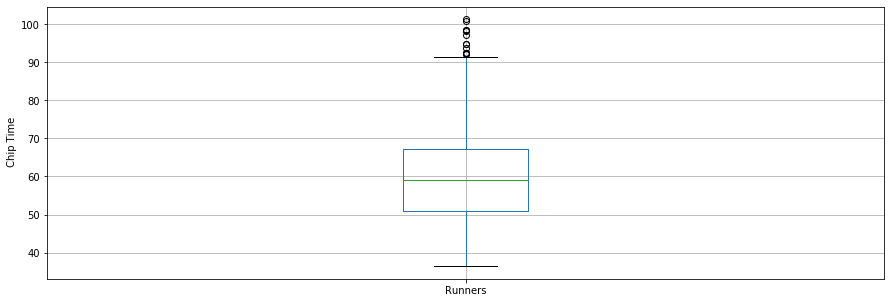

In [49]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel(' Chip Time')
plt.xticks([1], ['Runners'])

Below is a distribution plot of runners' chip times plotted using the seaborn library. The distribution looks almost normal.

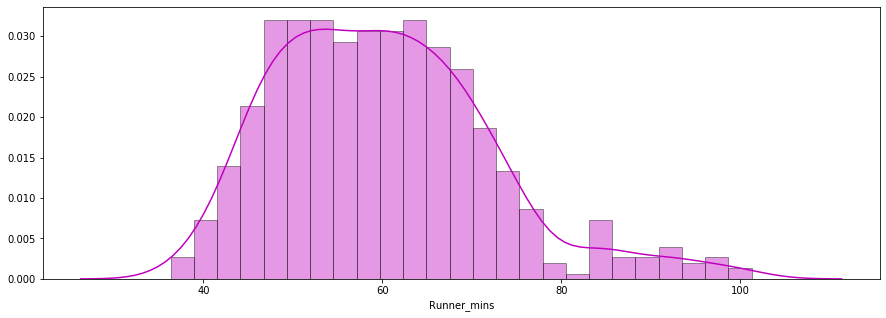

In [42]:
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

were there any performance differences between males and females?? of various age groups. Below is a distribution plot of chip times for males and females.

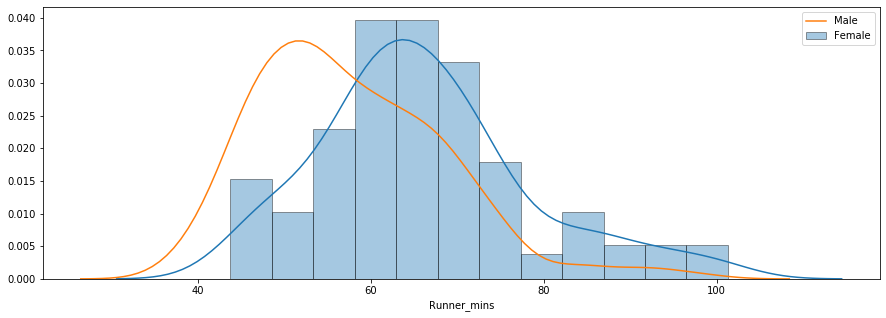

In [43]:
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [44]:
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

         Time2                                                         \
         count       mean        std        min        25%        50%   
 Gender                                                                 
 F       163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M       414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                               Runner_mins                                   \
               75%         max       count       mean        std        min   
 Gender                                                                       
 F       72.058333  101.300000       163.0  66.119223  12.184440  43.766667   
 M       64.804167   98.516667       414.0  57.640821  11.011857  36.350000   

                                                      
               25%        50%        75%         max  
 Gender                                               
 F       58.758333  64.616667  72.058333  101.300000  
 M       49.395833

Text(0.5, 0.98, '')

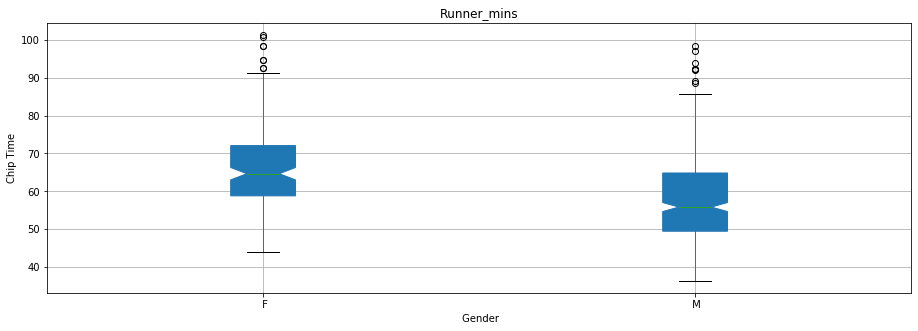

In [66]:
df7.boxplot(column='Runner_mins', by=' Gender',notch=True,patch_artist=True)
plt.rcParams['axes.facecolor'] = 'white'
plt.ylabel('Chip Time')
plt.suptitle("")

In [59]:
#Transforming Object type to hour dataframes.
time = ['1:38:17','1:38:31','1:38:32']
gender = ['M','F','M']
data = pd.DataFrame({
        'Time':time,
        'Gender':gender
        })

data

,Time,Gender
0,1:38:17,M
1,1:38:31,F
2,1:38:32,M


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
Time      3 non-null object
Gender    3 non-null object
dtypes: object(2)
memory usage: 176.0+ bytes


In [48]:
# Time conversion
data['Time'] = pd.to_timedelta(data['Time']) 
# Time in days 
data = data.assign(Time_in_days = [x.days for x in data['Time']])
# Time in hour
data = data.assign(Time_in_hour = [(x.seconds)/(60.0*60.0) for x in data['Time']] )
# Time in minutes 
data = data.assign(Time_in_minutes = [(x.seconds)/60.0 for x in data['Time']])
# Time in seconds
data = data.assign(Time_in_seconds = [x.seconds * 1.0 for x in data['Time']] )

print(data)

      Time Gender  Time_in_days  Time_in_hour  Time_in_minutes  \
0 01:38:17      M             0      1.638056        98.283333   
1 01:38:31      F             0      1.641944        98.516667   
2 01:38:32      M             0      1.642222        98.533333   

   Time_in_seconds  
0           5897.0  
1           5911.0  
2           5912.0  
